DATA SCIENCE

T094 : Shubhangi Mane

AIM : Data Visualization and Storytelling
 Create meaningful visualizations using data visualization tools
 Combine multiple visualizations to tell a compelling data story.
 Present the findings and insights in a clear and concise manner.

   order_id          order_date   sku      color      size  unit_price  \
0         1   2022/6/1 16:05:00   708  Dark Blue       2XL         298   
1         1   2022/6/1 16:05:00    89  Dark Blue       2XL         258   
2         2  2022/6/10 17:03:00  bobo      Cream  One Size         228   
3         3  2022/6/10 19:59:00   799  Dark Blue        XL         264   
4         4  2022/6/11 11:42:00   799  Dark Blue         M         264   

   quantity  revenue  
0         1      298  
1         1      258  
2         1      228  
3         1      264  
4         1      264  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    527 non-null    int64 
 1   order_date  527 non-null    object
 2   sku         527 non-null    object
 3   color       527 non-null    object
 4   size        490 non-null    object
 5   unit_price  527 non-null    

/tmp/ipython-input-3990502572.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['size'].fillna(df['size'].mode()[0], inplace=True)


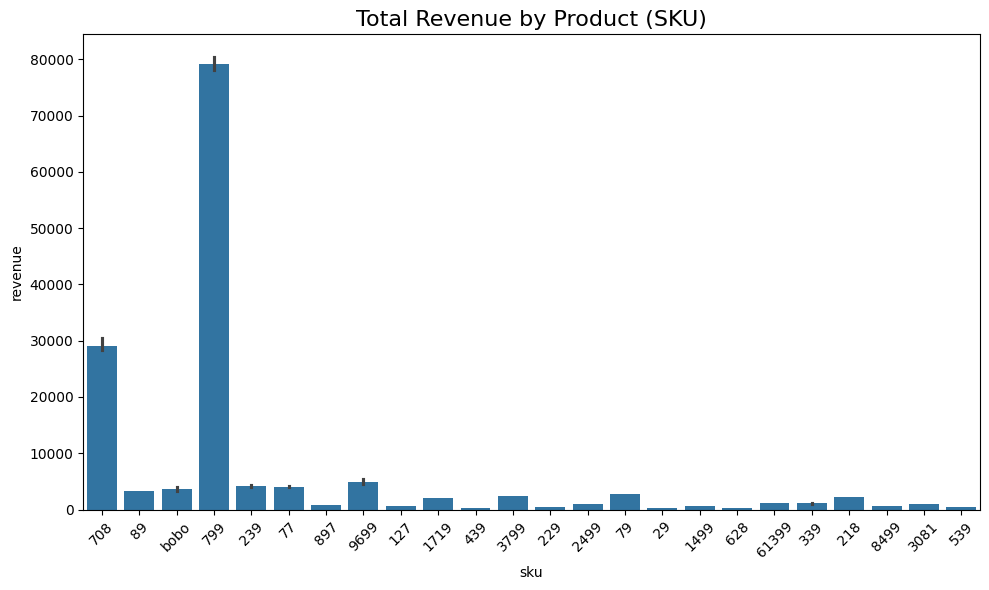

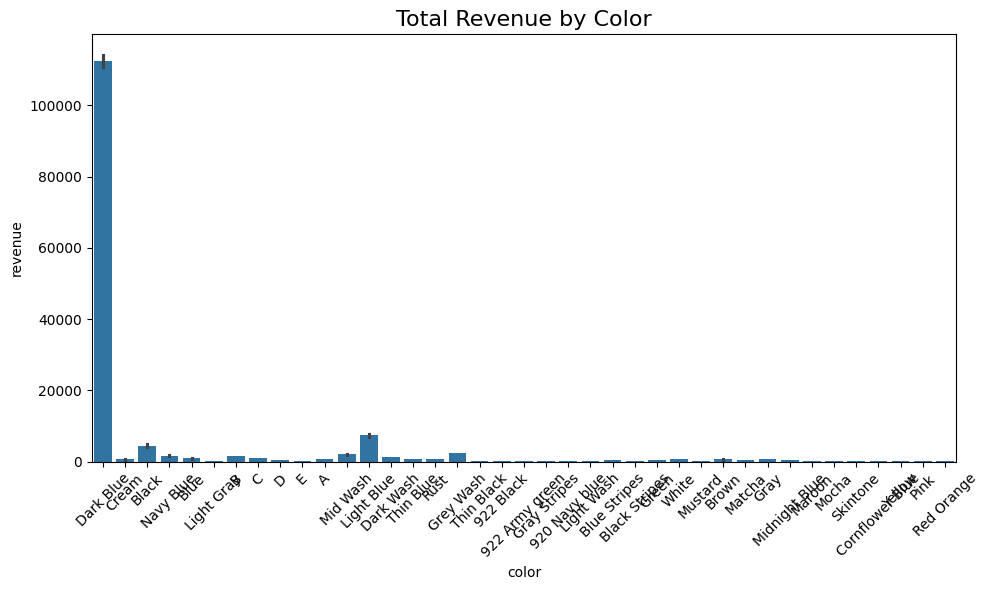

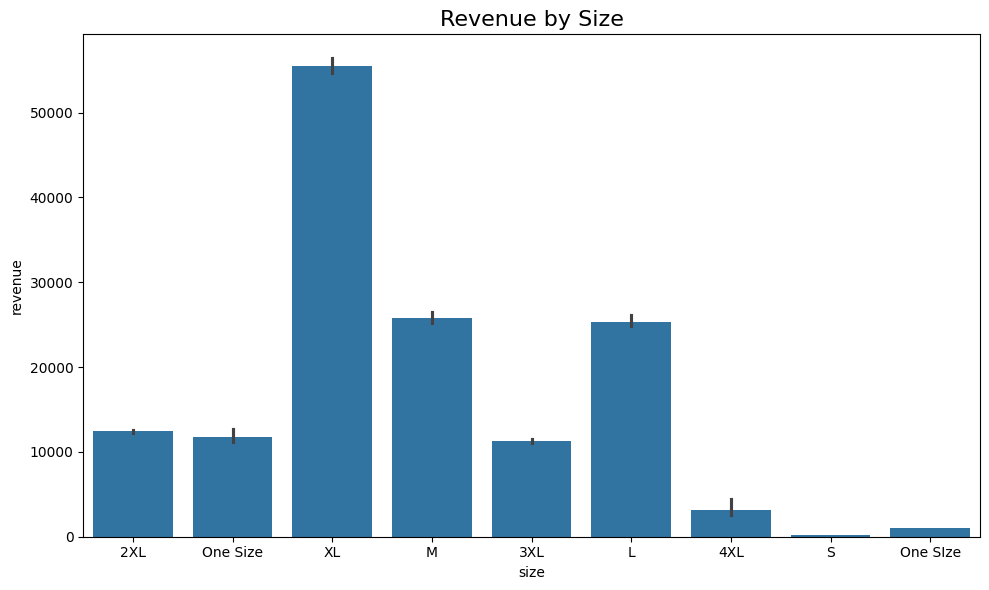

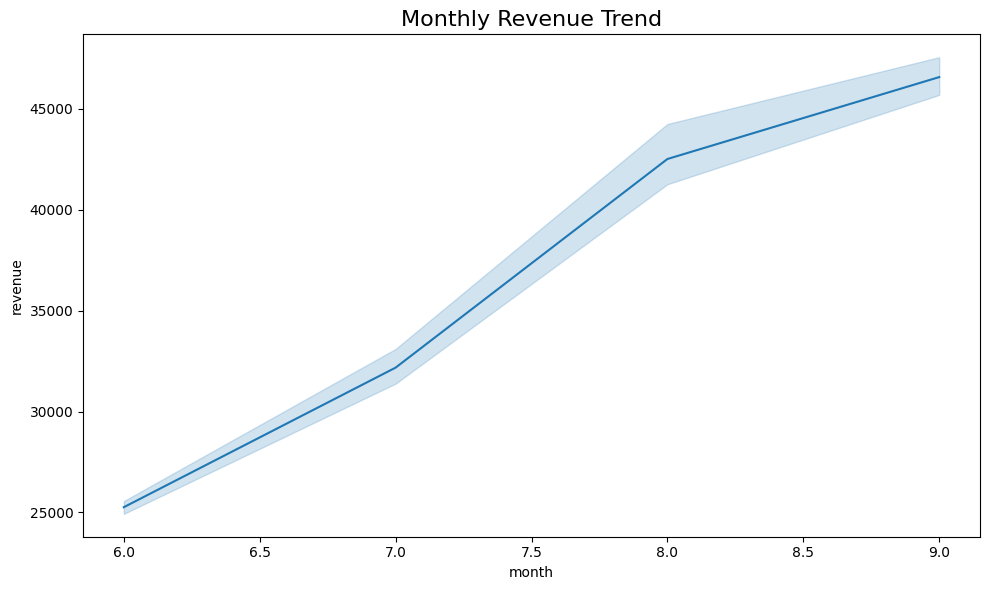

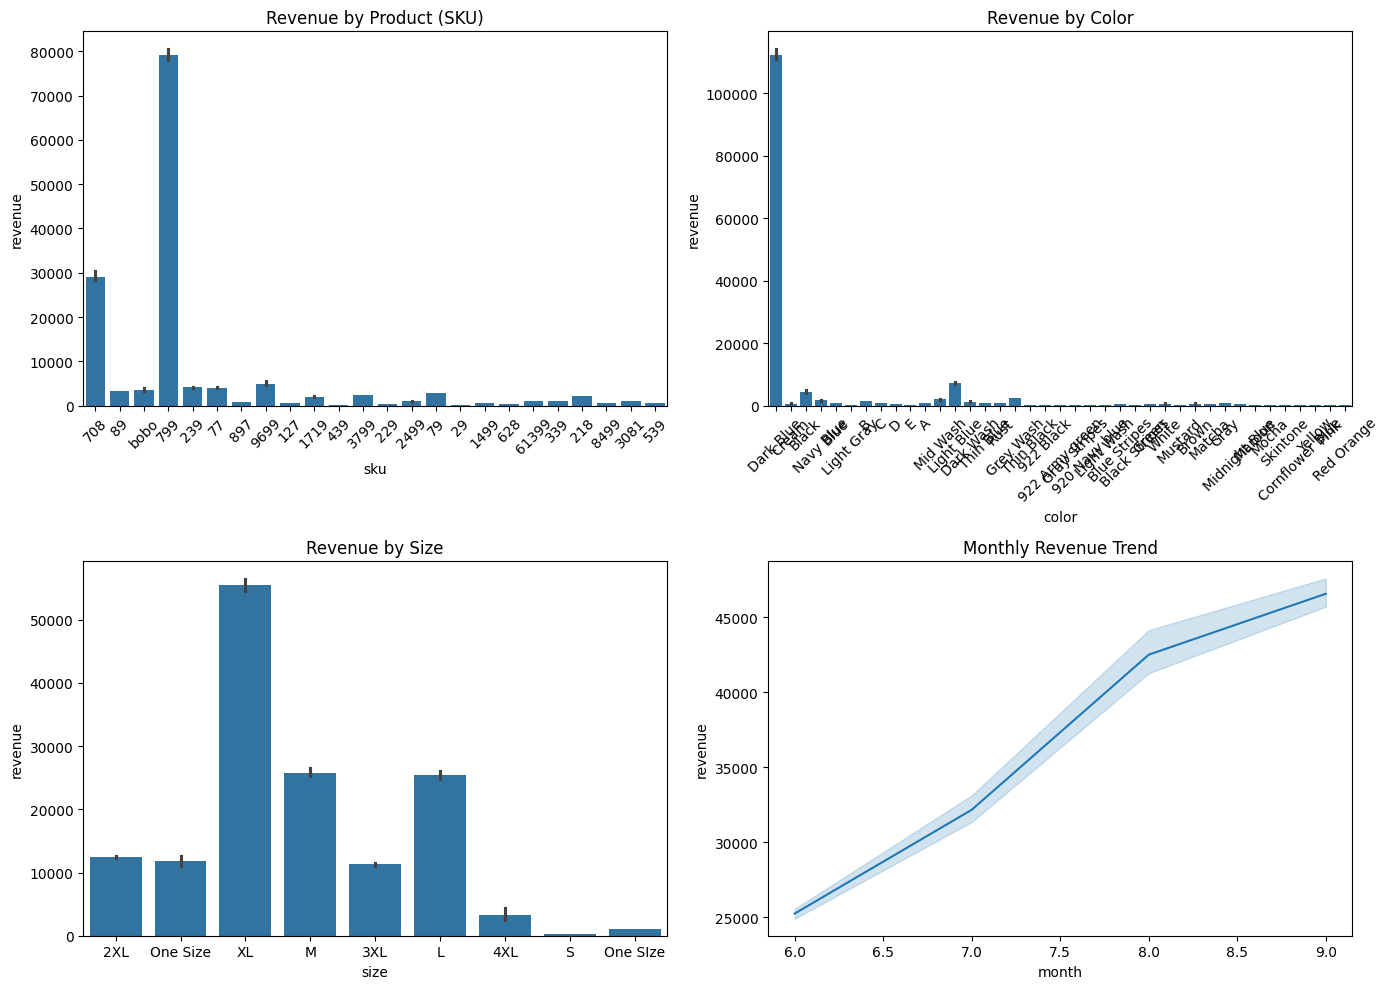


--- KEY INSIGHTS ---

Top Product Performance: Certain SKUs generate significantly higher revenue, showing customer preference.

Color Trends: Some colors contribute more to sales, revealing popular fashion choices.

Size Demand: Most frequently purchased sizes can help optimize inventory.

Monthly Sales Pattern: Revenue trends across months show demand cycles and peak seasons.



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 1: Load and Inspect the Dataset

df = pd.read_csv("women_clothing_ecommerce_sales.csv")

# Inspect the first few rows
print(df.head())

# Basic info
print(df.info())

# Summary stats
print(df.describe())


# Step 2: Data Cleaning & Preparation


# Check missing values
print("Missing Values:\n", df.isnull().sum())

# Fill missing 'size' with the mode
df['size'].fillna(df['size'].mode()[0], inplace=True)

# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Create new features
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day
df['year'] = df['order_date'].dt.year


# Step 3: Visualizations

# 3a. Revenue by Product (SKU)
plt.figure(figsize=(10, 6))
sns.barplot(x='sku', y='revenue', data=df, estimator=sum)
plt.title("Total Revenue by Product (SKU)", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3b. Revenue by Color
plt.figure(figsize=(10, 6))
sns.barplot(x='color', y='revenue', data=df, estimator=sum)
plt.title("Total Revenue by Color", fontsize=16)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3c. Revenue by Size
plt.figure(figsize=(10, 6))
sns.barplot(x='size', y='revenue', data=df, estimator=sum)
plt.title("Revenue by Size", fontsize=16)
plt.tight_layout()
plt.show()

# 3d. Monthly Sales Trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='revenue', data=df, estimator=sum)
plt.title("Monthly Revenue Trend", fontsize=16)
plt.tight_layout()
plt.show()


# Step 4: Combined Storytelling Visualization


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Revenue by SKU
sns.barplot(x='sku', y='revenue', data=df, estimator=sum, ax=axes[0, 0])
axes[0, 0].set_title("Revenue by Product (SKU)")
axes[0, 0].tick_params(axis='x', rotation=45)

# Revenue by Color
sns.barplot(x='color', y='revenue', data=df, estimator=sum, ax=axes[0, 1])
axes[0, 1].set_title("Revenue by Color")
axes[0, 1].tick_params(axis='x', rotation=45)

# Revenue by Size
sns.barplot(x='size', y='revenue', data=df, estimator=sum, ax=axes[1, 0])
axes[1, 0].set_title("Revenue by Size")

# Monthly Trend
sns.lineplot(x='month', y='revenue', data=df, estimator=sum, ax=axes[1, 1])
axes[1, 1].set_title("Monthly Revenue Trend")

plt.tight_layout()
plt.show()


# Step 5: Key Insights

insights = {
    "Top Product Performance": "Certain SKUs generate significantly higher revenue, showing customer preference.",
    "Color Trends": "Some colors contribute more to sales, revealing popular fashion choices.",
    "Size Demand": "Most frequently purchased sizes can help optimize inventory.",
    "Monthly Sales Pattern": "Revenue trends across months show demand cycles and peak seasons."
}

print("\n--- KEY INSIGHTS ---\n")
for key, value in insights.items():
    print(f"{key}: {value}\n")


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("women_clothing_ecommerce_sales.csv")

# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')


Category: Time-series & Seasonality Insights

Daily Revenue Trend

Shows peak days and low-performing days.

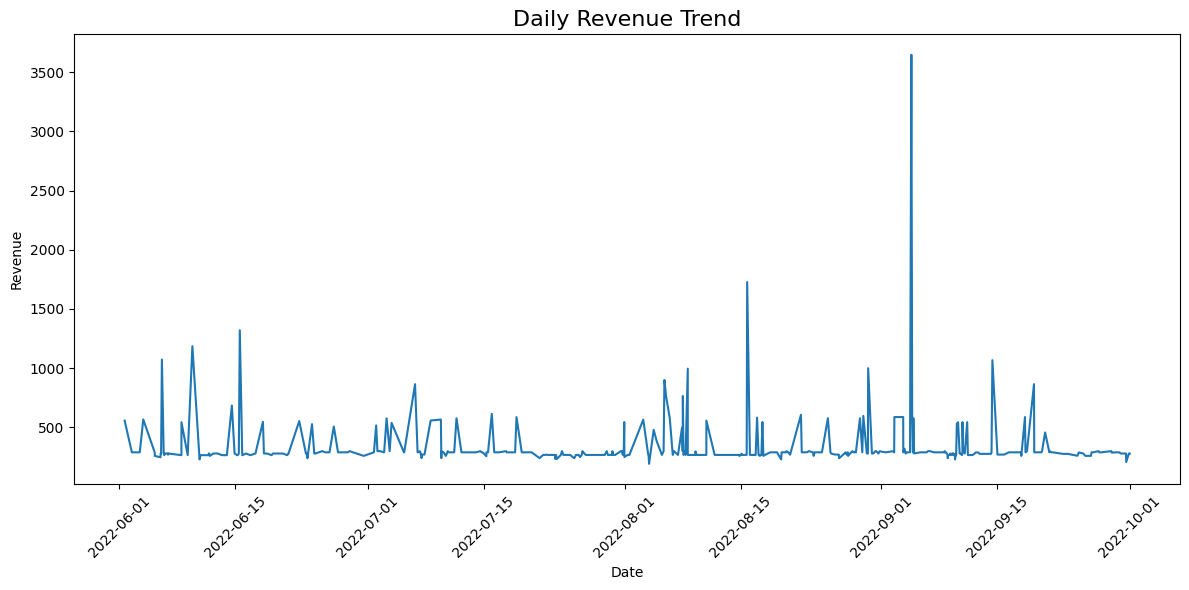

In [ ]:
plt.figure(figsize=(12,6))
daily = df.groupby('order_date')['revenue'].sum()
plt.plot(daily.index, daily.values)
plt.title("Daily Revenue Trend", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


for Daily Revenue Trend

The daily revenue trend graph visualizes how much revenue the e-commerce store generated each day based on the Women Clothing E-Commerce Sales dataset. Each point on the line represents the total sales revenue for a specific date. The visualization highlights patterns in customer purchasing behavior, showing days of high activity with revenue peaks and quieter days with dips. This helps identify demand fluctuations, strong sales days, and potential seasonal or promotional effects. Overall, this trend line provides essential insights for understanding daily business performance and planning future sales strategies.

order_date is converted to datetime

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')


print

In [ ]:
print(df['order_date'].head())


0   2022-06-01 16:05:00
1   2022-06-01 16:05:00
2   2022-06-10 17:03:00
3   2022-06-10 19:59:00
4   2022-06-11 11:42:00
Name: order_date, dtype: datetime64[ns]


Create day & month columns again

In [ ]:
df['month'] = df['order_date'].dt.month
df['day'] = df['order_date'].dt.day
df['year'] = df['order_date'].dt.year


print

In [ ]:
print(df[['order_date','day','month']].head())


           order_date  day  month
0 2022-06-01 16:05:00    1      6
1 2022-06-01 16:05:00    1      6
2 2022-06-10 17:03:00   10      6
3 2022-06-10 19:59:00   10      6
4 2022-06-11 11:42:00   11      6


Heatmap: Revenue by Day vs Month (Calendar-style)

BEST for presenting in a project/report.

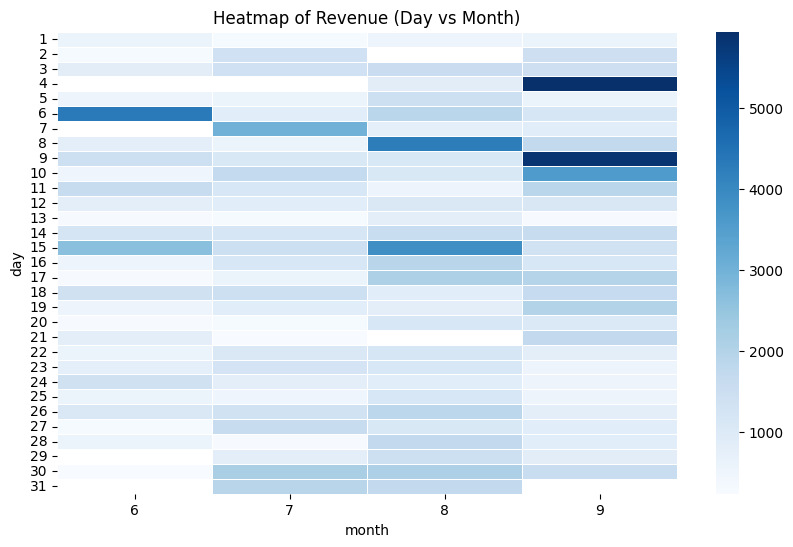

In [ ]:
pivot = df.pivot_table(values='revenue', index='day', columns='month', aggfunc='sum')

plt.figure(figsize=(10,6))
sns.heatmap(pivot, cmap='Blues', linewidths=.5)
plt.title("Heatmap of Revenue (Day vs Month)")
plt.show()


Heatmap: Revenue by Day vs Month (Calendar-style)



The revenue heatmap provides a detailed view of how daily revenue behaves across different months in the Women Clothing E-commerce Sales dataset. Each cell represents the total revenue generated on a particular day of a given month, with darker shades indicating stronger sales. This visualization makes it easy to spot high-performing days, periods of lower customer activity, and month-over-month demand fluctuations. By revealing consistent patterns and seasonal behaviors, the heatmap helps the business understand when customers are most active, enabling better planning for promotions, inventory, and staffing.

Category: Product Insight Visuals

Top 10 Best-Selling SKUs

Helps identify most profitable products.

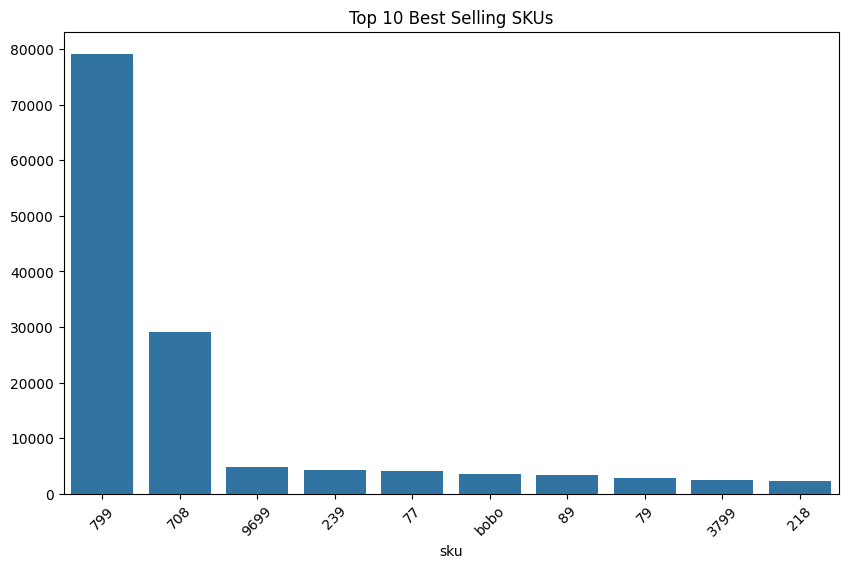

In [ ]:
sku_top10 = df.groupby('sku')['revenue'].sum().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=sku_top10.index, y=sku_top10.values)
plt.title("Top 10 Best Selling SKUs")
plt.xticks(rotation=45)
plt.show()


Top 10 Best-Selling SKUs

The Top 10 Best-Selling SKUs chart highlights which products generated the highest revenue in the Women Clothing E-commerce Sales dataset. Each bar represents the total revenue of a specific SKU, clearly showing which items customers purchased the most. The visualization reveals a strong concentration of sales among a few top-performing products, indicating high customer preference and consistent demand. These insights help the business identify its most profitable items, optimize inventory planning, and focus marketing efforts on the products that drive the majority of sales

Price vs Revenue Scatter Plot

Shows if higher-priced items generate more revenue.

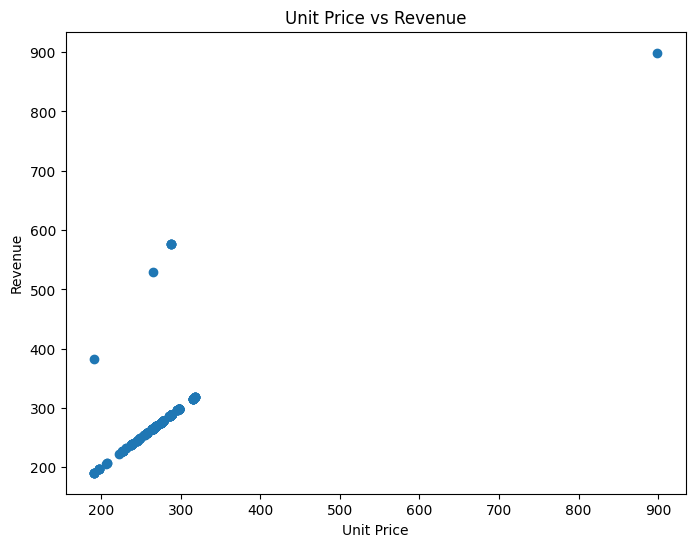

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['unit_price'], df['revenue'])
plt.title("Unit Price vs Revenue")
plt.xlabel("Unit Price")
plt.ylabel("Revenue")
plt.show()


Price vs Revenue Scatter Plot



The Unit Price vs Revenue scatter plot visualizes the relationship between product pricing and the revenue generated in the Women Clothing E-commerce Sales dataset. Each point represents a single transaction, and the diagonal pattern indicates that most customers purchase one item per order, making revenue almost equal to the unit price. A few points above the main line represent cases where customers bought more than one quantity or purchased higher-priced products. This visualization highlights consistent pricing behavior, limited multi-item purchases, and provides insights into how product price influences order revenue.

Category: Customer Choice Behavior

 Color Popularity Count Plot

Not revenue — quantity sold (very useful).

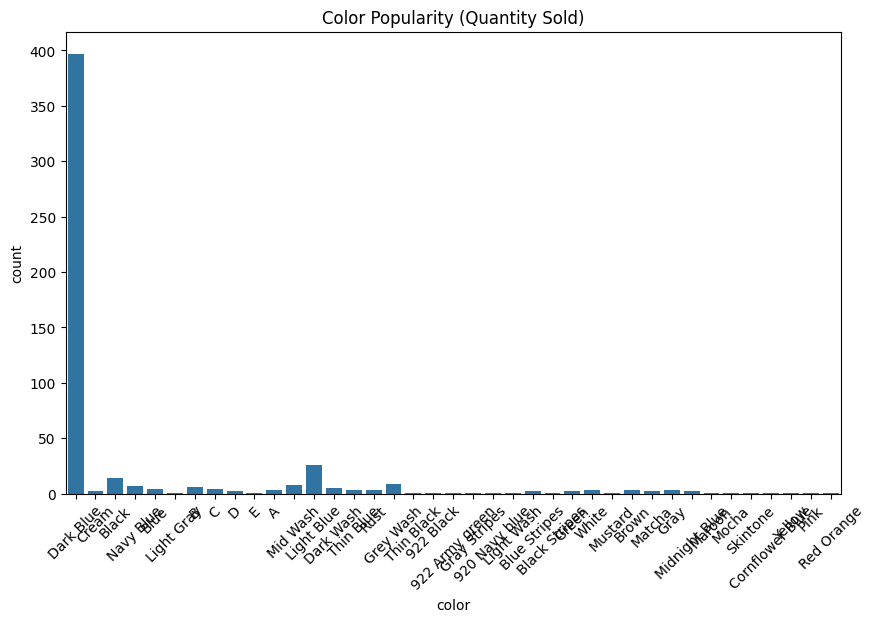

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['color'])
plt.title("Color Popularity (Quantity Sold)")
plt.xticks(rotation=45)
plt.show()

Color Popularity Count Plot


To understand how customers interact with our products, we examined the colors they prefer most. Using the transaction dataset, we created a Color Popularity Count Plot, where each bar represents the number of units sold for a particular color. Unlike revenue-based charts, this visualization focuses purely on quantity sold, giving a clearer picture of customer preference independent of price differences.

From the plot, we can instantly identify which colors attract the highest customer demand. Taller bars represent the bestselling colors, indicating strong customer preference, trend alignment, or better visual appeal of that product variation. Meanwhile, colors with shorter bars show lower interest or possibly limited availability.

This insight is extremely valuable for inventory planning and marketing strategies. By stocking more of the high-demand colors and running promotions for the less popular ones, the business can improve customer satisfaction, reduce stockouts, and optimize overall inventory efficiency.

Size Distribution Pie Chart

Perfect for fashion retail datasets.

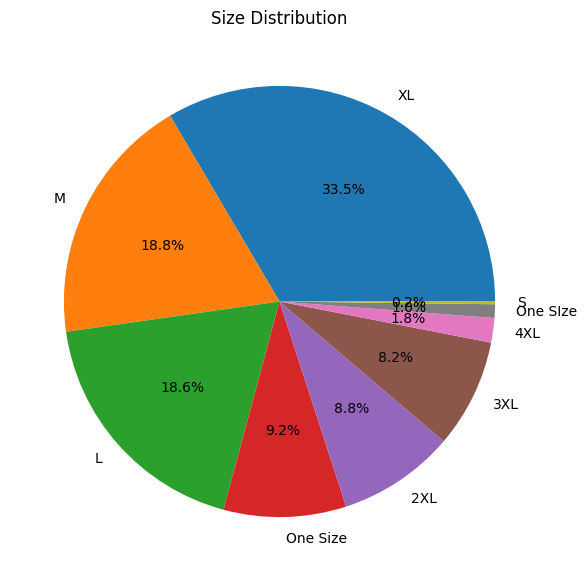

In [ ]:
size_data = df['size'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(size_data, labels=size_data.index, autopct='%1.1f%%')
plt.title("Size Distribution")
plt.show()


Distribution Pie Chart

Understanding what product sizes customers prefer is essential for optimizing inventory and ensuring demand is consistently met. To uncover these preferences, we analyzed the frequency of each size ordered and visualized it using a Size Distribution Pie Chart.

Each slice of the pie represents the proportion of total sales attributed to a specific size. This allows us to quickly see which sizes dominate customer purchases. Larger slices indicate the most commonly chosen sizes—these are the sizes customers consistently prefer and therefore require higher stocking levels. Conversely, smaller slices highlight sizes with minimal demand, which may signal niche preferences or potential overstock issues.

This visualization provides immediate, actionable insights. By aligning inventory levels with size popularity, the business can reduce stockouts for high-demand sizes, minimize excess inventory for slow-moving ones, and improve overall customer satisfaction.

Category: Revenue Contribution

 Pareto Chart (80/20 Analysis)

Shows which few products generate most revenue.

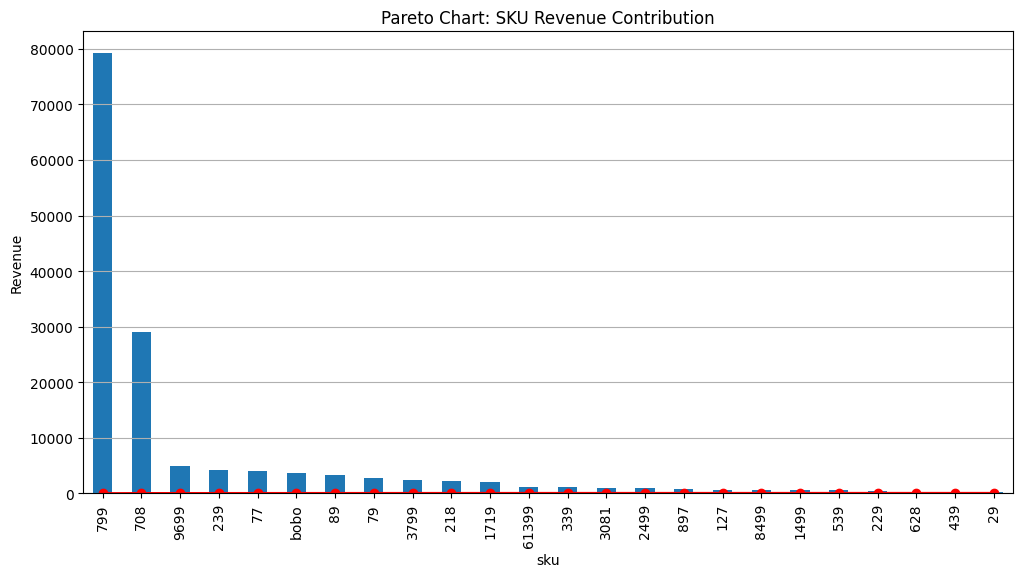

In [ ]:
sku_rev = df.groupby('sku')['revenue'].sum().sort_values(ascending=False)
cum_percent = sku_rev.cumsum() / sku_rev.sum() * 100

plt.figure(figsize=(12,6))
sku_rev.plot(kind='bar')
plt.plot(cum_percent.values, color='red', marker='o')
plt.title("Pareto Chart: SKU Revenue Contribution")
plt.ylabel("Revenue")
plt.grid(axis='y')
plt.show()


Pareto Chart (SKU Revenue Contribution)

To understand how different products contribute to total revenue, we plotted a Pareto Chart using SKU-level revenue data. This chart follows the 80/20 Principle, which suggests that a small number of products often generate the majority of sales.

The blue bars represent the revenue generated by each SKU, sorted from highest to lowest. The red line shows the cumulative percentage of total revenue, helping us identify the point where revenue contribution starts to flatten.

From the visualization, we can quickly see which SKUs are the top earners—these are the primary drivers of business revenue. As the cumulative curve rises steeply in the beginning, it reveals that a few high-performing SKUs contribute to a large share of total earnings. Toward the right side of the chart, the line begins to level off, indicating that additional SKUs contribute relatively little.

This analysis helps the business prioritize focus areas:

Top SKUs should receive more marketing, inventory priority, and stock monitoring.

Low-performing SKUs can be reviewed for redesign, discounting, or removal.

The Pareto Chart thus provides both a clear visual and strategic insight into which products are truly powering business revenue.

Category: Correlation & Pattern Analysis

 Correlation Heatmap

Gives relationships between numeric features.

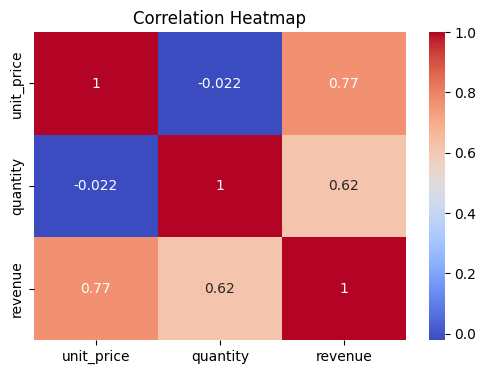

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['unit_price','quantity','revenue']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Correlation Heatmap

To understand how different numerical factors influence sales, we created a Correlation Heatmap using three key variables: unit price, quantity sold, and revenue. This heatmap visually highlights the strength and direction of relationships between these variables.

The colors tell a clear story:

Warmer shades (toward red) indicate strong positive correlations, meaning both variables move together.

Cooler shades (toward blue) indicate negative correlations, where one increases while the other decreases.

The heatmap reveals a strong positive correlation between quantity sold and revenue, which is expected—more units sold directly increase revenue. Another noticeable relationship is between unit price and revenue; while price contributes to revenue, the correlation level shows whether revenue is more volume-driven or price-driven.

This visualization helps us understand what truly drives revenue. If quantity has the strongest influence, strategies like discounts or promotions may boost sales. If price correlates strongly, premium pricing or focusing on higher-value SKUs may be more effective.

Overall, the heatmap provides a quick, data-backed picture of how the core metrics interact, guiding smarter business decisions.

Boxplot – Revenue by Color / Size / SKU

Great to see price variation patterns.

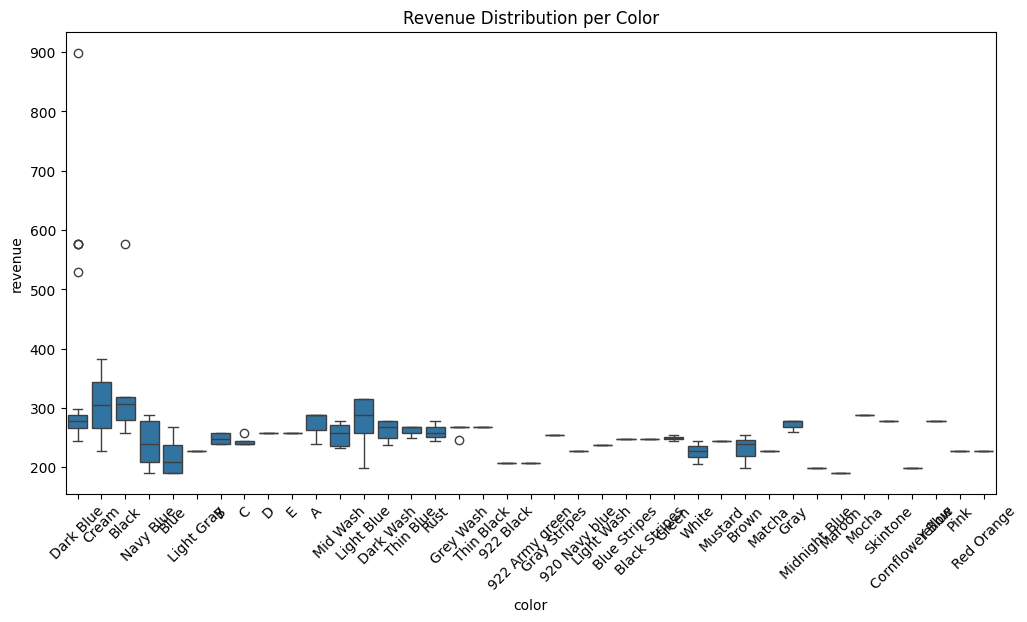

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='color', y='revenue', data=df)
plt.xticks(rotation=45)
plt.title("Revenue Distribution per Color")
plt.show()


Boxplot: Revenue Distribution per Color

To understand how different product colors contribute to revenue, we visualized the Revenue Distribution per Color using a boxplot. This plot gives a deeper insight than simple averages because it highlights variation, outliers, and consistency within each color category.

Each box represents the spread of revenue generated by items of that color.
You can interpret the distribution as follows:

The height of the box shows how widely the revenue varies for that color.

The median line inside the box indicates the typical revenue generated.

Whiskers and outliers reveal whether certain colors occasionally generate exceptionally high or low revenue.

This visualization helps identify which colors consistently perform well and which ones have unpredictable or low revenue generation.
For example:

A color with a high median and tall box signals strong and varied demand.

A low or narrow box suggests limited or steady low performance.

Outliers may indicate special cases where a particular product color spiked in sales.

Overall, this boxplot helps businesses understand customer spending patterns across different colors, enabling smarter decisions in inventory planning, marketing focus, and product design.